In [1]:
from torch.optim import SGD

import matplotlib.pyplot as plt

import torch.nn as nn
import torch

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2 * x + torch.randn(5, 1)

In [38]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1, bias=True)

    def forward(self, x):
        y = self.fc(x)
        return y

In [39]:
model = LinearRegressor()
learning_rate = 1e-3
critetion = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=learning_rate)

In [40]:
loss_ = list()
for epoch in range(1001):
    optimizer.zero_grad()
    y_hat = model(x)

    loss = critetion(y_hat, y)
    loss.backward()
    optimizer.step()

    loss_.append(loss.item())
    
    if epoch % 100 == 0:
        print(f"Epoch : {epoch}:{loss.item()}")

Epoch : 0:10.627614974975586
Epoch : 100:1.4929656982421875
Epoch : 200:0.8593926429748535
Epoch : 300:0.799979567527771
Epoch : 400:0.781090259552002
Epoch : 500:0.7666043043136597
Epoch : 600:0.7539018392562866
Epoch : 700:0.7426393628120422
Epoch : 800:0.7326452732086182
Epoch : 900:0.7237762212753296
Epoch : 1000:0.7159053087234497


In [41]:
with torch.no_grad():
    y_hat = model(x)

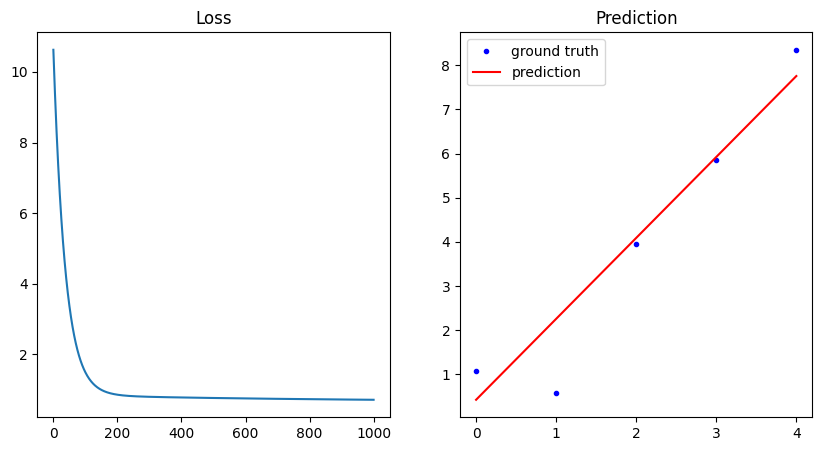

In [42]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_)
plt.title("Loss")

plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")

plt.show()